# Clustering 
1. Hierarchical clustering
2. K-means clustering
3. DBScanner clustering

#### Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth #
from sklearn.neighbors import NearestNeighbors #
from sklearn.mixture import GaussianMixture #
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.spatial.distance import pdist, squareform


In [5]:
df = pd.read_csv('Processed_Data.csv')

In [11]:
df.head(5)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_22,HR_23,customer_city,chain_category,engagement_duration,avg_order_frequency,tot_value_cui,preferred_order_day,preferred_order_hour,age_category
0,7.403556e+287,2360,18,2.0,5.0,1.0,0.0,1.0,NaN,NaN,...,0.0,0.0,2,NaN,1,5.0,28.88,0,18,26
1,7.403556e+287,8670,17,2.0,2.0,2.0,0.0,1.0,NaN,NaN,...,0.0,0.0,8,NaN,1,2.0,19.21,0,10,16
2,7.403556e+287,4660,38,1.0,2.0,2.0,0.0,1.0,NaN,NaN,...,0.0,0.0,4,NaN,1,2.0,9.20,0,9,42
3,7.403556e+287,4660,24,2.0,3.0,1.0,0.0,2.0,NaN,NaN,...,0.0,0.0,4,NaN,2,1.5,31.56,1,11,26
4,7.403556e+287,4660,20,2.0,5.0,0.0,0.0,2.0,NaN,NaN,...,0.0,0.0,4,NaN,2,2.5,55.44,1,8,26


In [17]:
metric_features = ['vendor_count', 'is_chain', 'first_order', 'last_order', 
                                       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                                       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                                       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
                                       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
                                       'CUI_Thai', 'engagement_duration', 'tot_value_cui', 
                                       'preferred_order_day', 'preferred_order_hour', 
                                       'age_category']

print('metric_features', metric_features)

metric_features ['vendor_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'engagement_duration', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category']


In [18]:
print(df[metric_features].dtypes)

vendor_count                float64
is_chain                    float64
first_order                 float64
last_order                  float64
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
engagement_duration           int64
tot_value_cui               float64
preferred_order_day           int64
preferred_order_hour          int64
age_category                  int64
dtype: object


With this we can confirm that all features features are numeric (`float64` and `int64`)

StandardScaler 

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['vendor_count', 'is_chain', 'first_order', 'last_order', 
                                       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                                       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                                       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
                                       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
                                       'CUI_Thai', 'engagement_duration', 'tot_value_cui', 
                                       'preferred_order_day', 'preferred_order_hour', 
                                       'age_category']])

### Hierarchical Clustering 

##### Linkage Matrix

In [22]:
linkage_matrix = linkage(scaled_data, method='ward')

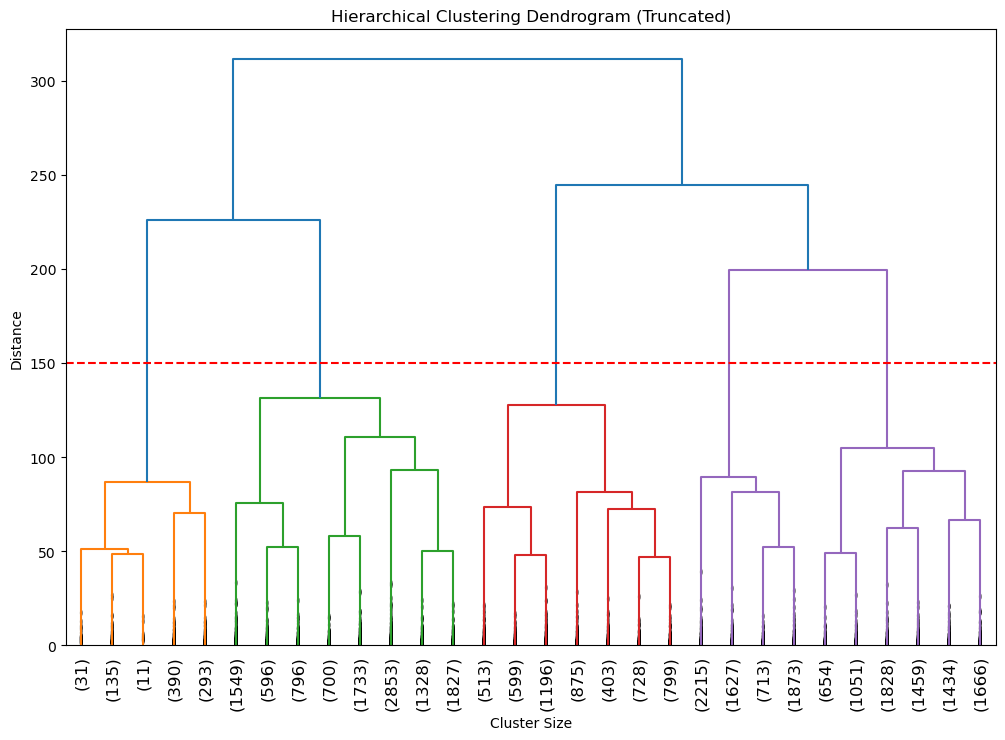

In [27]:
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  
    p=30,  
    leaf_rotation=90.,  
    leaf_font_size=12., 
    show_contracted=True )

plt.axhline(y=150, color='r', linestyle='--') 
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [28]:
cluster_labels = fcluster(linkage_matrix, t=150, criterion='distance')

In [29]:
df['Cluster'] = cluster_labels
print(df['Cluster'].value_counts())

Cluster
2    11382
5     8092
4     6428
3     5113
1      860
Name: count, dtype: int64


### 1. Dendrogram
The dendrogram was generated using the **Ward's Linkage** method, which minimizes the variation within clusters. 
- The red line represents the **cut-off height** defined at `t=150`.
- This line determines the number of clusters by "cutting" the dendrogram.
- The branches below the red line correspond to the formed clusters.

### 2. Formed Clusters
**5 clusters** were identified, with the following sizes:

| Cluster | Number of Samples |
|---------|--------------------|
| 1       | 860                |
| 2       | 11,382             |
| 3       | 5,113              |
| 4       | 6,428              |
| 5       | 8,092              |


### 2. K-Means ###

### 3. DBSCAN (Density-based spatial clustering of applications with noise)
### Testeeeeeee

In [19]:
# Splitting feature names into groups
# Remember which metric_features we decided to keep?
metric_features = df.select_dtypes(include=['number']).columns.tolist()

# Identify non-metric (categorical) features
non_metric_features = df.select_dtypes(exclude=['number']).columns.tolist()
pc_features = df.columns[df.columns.str.startswith('PC')].tolist()  

unused_features = [i for i in df.columns if i not in (metric_features+non_metric_features+pc_features) ]

In [20]:
print('metric_features:', metric_features)
print('\nnon_metric_features:', non_metric_features)
print('\nunused_features:', unused_features)
print('\npc_features:', pc_features)

metric_features: ['customer_region', 'customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'customer_city', 'engagement_duration', 'avg_order_frequency', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category', 'cluster']

non_metric_features: ['customer_id', 'last_promo', 'payment_method', 'chain_category']

unused_features: []

pc_features: []


In [21]:
# Display only columns with missing values
missing_values_all = df.isnull().sum()
missing_values = missing_values_all[missing_values_all > 0]

# Display the columns with missing values
print(missing_values)

avg_order_frequency    156
dtype: int64


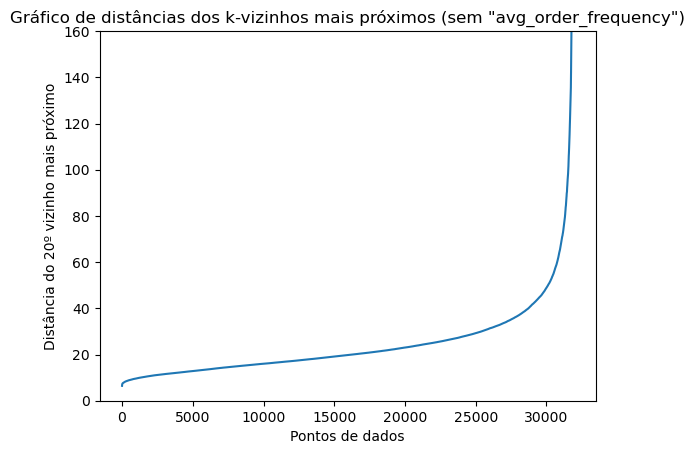

In [22]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Excluir a feature "avg_order_frequency" das metric features
features_for_distance = [feature for feature in metric_features if feature != "avg_order_frequency"]

# Calcular as distâncias dos k-vizinhos mais próximos
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df[features_for_distance])
distances, _ = neigh.kneighbors(df[features_for_distance])

# Ordenar as distâncias
distances = np.sort(distances[:, -1])

# Plotar o gráfico das distâncias
plt.plot(distances)
plt.xlabel('Pontos de dados')
plt.ylabel('Distância do 20º vizinho mais próximo')
plt.title('Gráfico de distâncias dos k-vizinhos mais próximos (sem "avg_order_frequency")')

# Alterar os limites do eixo y para 0 a 160
plt.ylim(0, 160)

plt.show()


In [23]:
# Concatenating the labels to df
df_concat = pd.concat([df[metric_features], pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_concat.head()

NameError: name 'dbscan_labels' is not defined

In [88]:
# Excluir a feature "total_value_cui" ao selecionar as features para o clustering
features_for_clustering = [feature for feature in metric_features if feature != "avg_order_frequency"]

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=40, min_samples=25, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df[features_for_clustering])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

#usei o eps=40 por causa do grafico
#usei min_samples=25 porque deve ser 2xdim e deve ser mais ou menos isso


Number of estimated clusters : 8


In [89]:
np.unique(dbscan_labels)


array([-1,  0,  1,  2,  3,  4,  5,  6])